In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
homework = pd.read_csv(r'C:\Users\user\Desktop\SHIFT\hw_3\HomeWork.csv', index_col=0)

Эти данные будут подготавливаться для древовидного алгоритма, например для catboost, который умеет работать с пропусками (с Nan значениями)

Изначально смысла заполнять Nan значения для текущей задачи особого нет, так как это может исказить наш анализ числовых данных, а для текстовых данные можно заполнить пустые поля значениями 'Missing value', что не повредит нашему анализу

In [4]:
homework.sort_values('date')

,status,income,age,date
309,Student,4000.0,21.0,2022-01-01
62,Businessman,891000.0,68.0,2022-01-01
464,Pensioner,NaN,88.0,2022-01-01
353,Pensioner,8000.0,96.0,2022-01-01
304,Working,60000.0,60.0,2022-01-01
485,Student,-2112.0,20.0,2022-01-01
172,Businessman,984000.0,NaN,2022-01-01
174,Student,NaN,20.0,2022-01-01
479,Businessman,954000.0,26.0,2022-01-01
412,Businessman,-4951.0,67.0,2022-01-01


In [5]:
homework['date'] = pd.to_datetime(homework['date'], format='%Y-%m-%d')

In [6]:
homework.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   status  490 non-null    object        
 1   income  430 non-null    float64       
 2   age     441 non-null    float64       
 3   date    500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 19.5+ KB


Тут можно увидеть, что пропуски есть в столбцах: status, income, age.

Притом в столбце income самое большое количество пропусков

А в столбце date нет пропусков

In [7]:
homework.describe()

,income,age
count,430.000000,441.000000
mean,152020.623256,46.362812
std,242647.036978,25.036517
min,-13745.000000,0.000000
25%,2000.000000,23.000000
50%,21000.000000,44.000000
75%,217000.000000,68.000000
max,992000.000000,99.000000


In [8]:
def get_outliers_info(df, d=1.5):
    """
    Статистика по наличию выбросов в признаках.
    df - датасет с признаками
    d - коэффициент, на который умножается IQR (обычно 1.5, что соотв. усам на boxplot)
    """
    df = df.copy()
    q75 = df.quantile(0.75)
    q25 = df.quantile(0.25)
    iqr = q75 - q25

    feature_list, outlier_list = [], []
    numerical_columns = [c for c in df.columns if
                         df[c].dtype in ['float64', 'int64'] and df[c].nunique() > 10]

    for feature in numerical_columns:
        lower_threshold = q25.loc[feature] - d * iqr[feature]
        upper_threshold = q75.loc[feature] + d * iqr[feature]

        df['is_outlier'] = np.nan
        df.loc[(df[feature] < lower_threshold) | (df[feature] > upper_threshold), 'is_outlier'] = 1
        df['is_outlier'] = df['is_outlier'].fillna(0)

        feature_list.append(feature)
        outlier_list.append(df['is_outlier'].mean())

    outliers_df = pd.DataFrame(index=feature_list, data=outlier_list, columns=['ratio_outliers'])
    outliers_df = outliers_df[outliers_df['ratio_outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='ratio_outliers', ascending=False)

    return outliers_df

In [9]:
get_outliers_info(homework)

,ratio_outliers
income,0.088


Исходя из формул ящика с усами используя стандартный коэффициент на который умножается интерквартильный размах равный 1.5 выбросы присутствуют только в столбце income

Так как целевого признака у нас тут нет, то будет начинать производить изучение с признаков

Для начала изучим корреляции

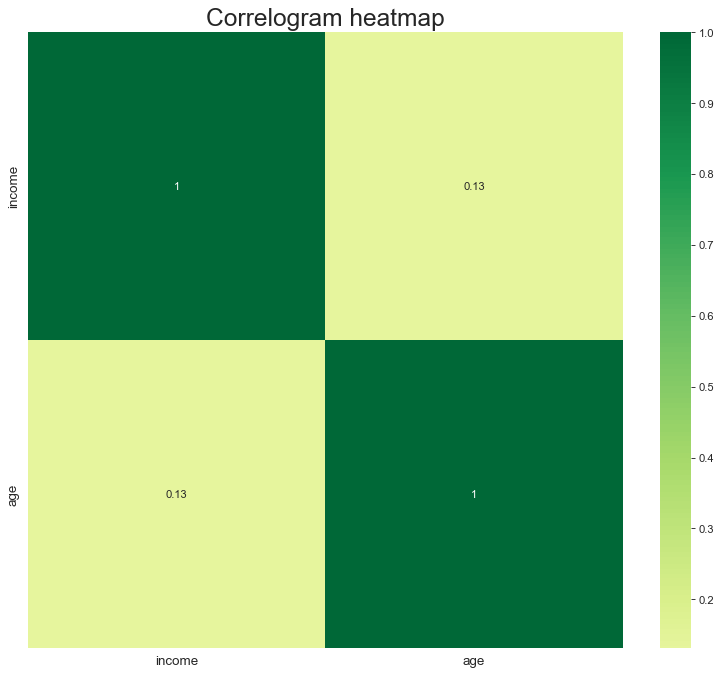

In [10]:
# Plot
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(homework.corr(), xticklabels=homework.corr().columns,
            yticklabels=homework.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram heatmap', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Как видно корреляция между столбцами income и age очень низкая, почти нулевая

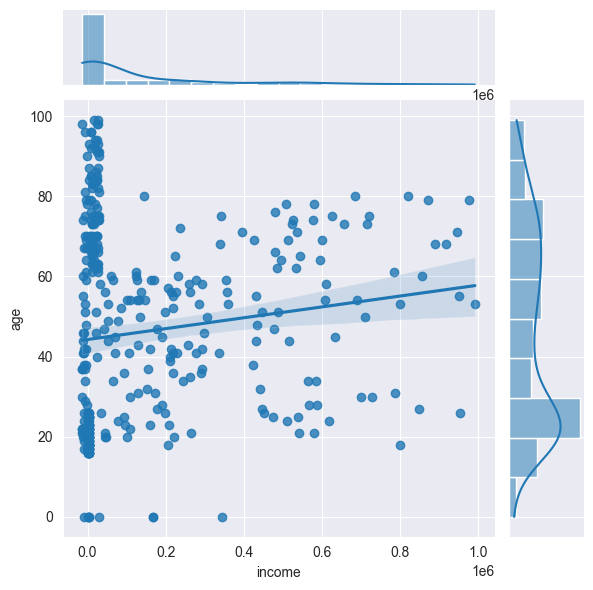

In [11]:
sns.jointplot(data=homework, x='income', y='age', kind='reg')

В столбце age видно, что минимальный возраст 0 - это возможно выброс, так как исходя из здравой логики у детей с возрастом 0 не может быть дохода

В столбце income у нас есть отрицательный инком, хотя это возможно, если обязательные списания с его карты превышают его зарплату, но больше похоже на выброс

В столбце income разница между квантилями 50% и 75% сильно больше чем между разница между квантилями 25% и 50%, то есть boxplot будет смещён сильно вправо

Из графика выше видно, то у людей после определенного возраста становится маленький доход, а до этого возраста доход может быть как маленьким, так и большим и видна слабая корреляция этих признаков

На этом графике, не очень удобо смотримое распределение признаков, поэтому построим распределение этих столбцов отдельно

<Axes: xlabel='income', ylabel='Count'>

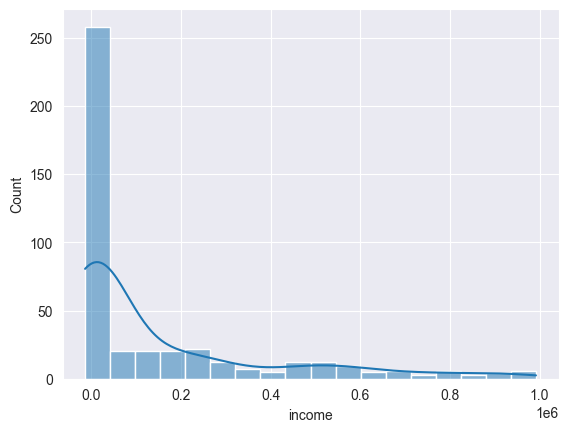

In [12]:
sns.histplot(data=homework, x="income", kde=True)

Не похоже на гаусовское распределение

<Axes: xlabel='age', ylabel='Count'>

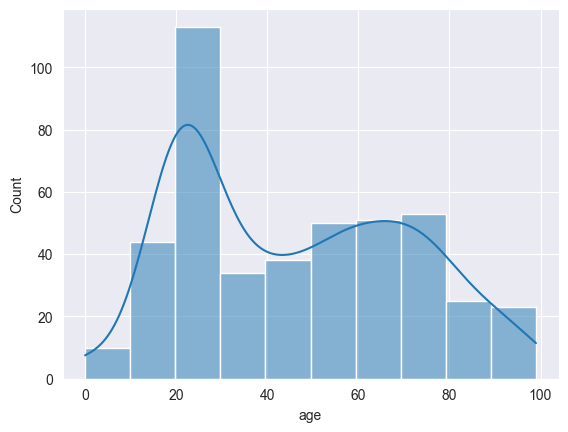

In [13]:
sns.histplot(data=homework, x="age", kde=True)

Это распределение похоже на два гаусовских распределения, которые сложили между собой, возможно для будущего анализа эти распределения стоит их разбить

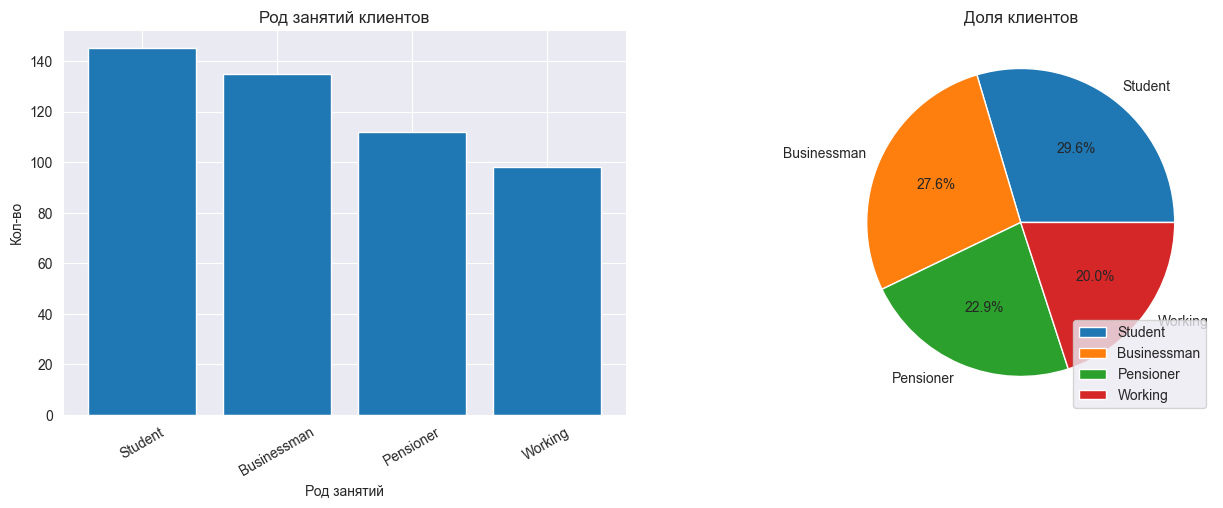

In [14]:
bar_chart_data = homework['status'].value_counts().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plt.subplot(121)

plt.bar(bar_chart_data['index'], bar_chart_data['status'])

plt.title('Род занятий клиентов')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30)

data_for_pie_chart = homework['status'].value_counts()
plt.subplot(122)

plt.pie(data_for_pie_chart, autopct='%1.1f%%', labels=data_for_pie_chart.index)

plt.title('Доля клиентов')
plt.legend()

plt.show()

Как видно из графиков, группа Students самая большая, но остальных групп не на порядок меньше чем группы Students

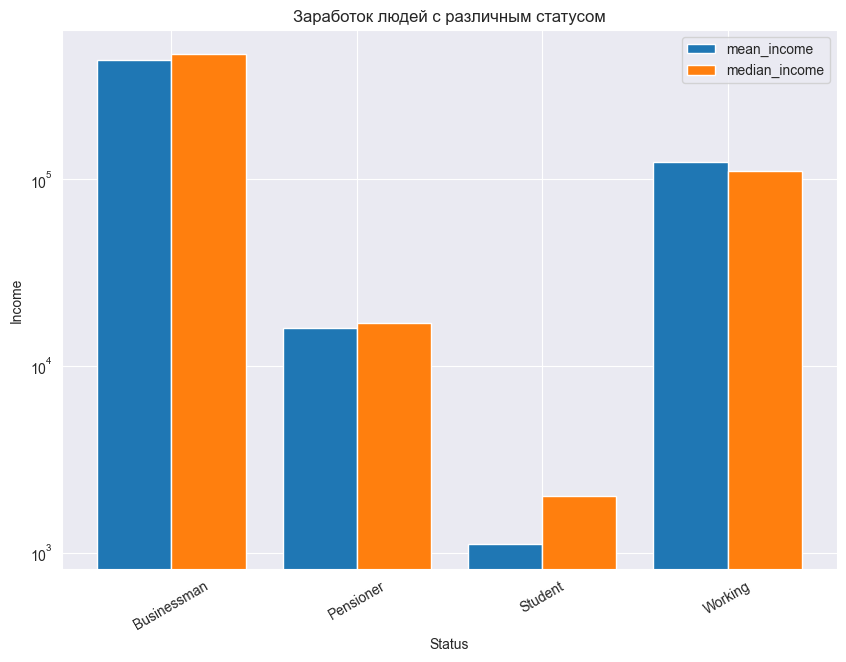

In [15]:
data_for_box_plox = pd.merge(
    pd.DataFrame(homework.groupby(homework["status"]).mean()['income']).rename(
        columns={'income': 'mean_income'}),
    pd.DataFrame(homework.groupby(homework["status"]).median()['income']).rename(
        columns={'income': 'median_income'}),
    left_index=True, right_index=True)
data_for_box_plox.reset_index(inplace=True)

# Строим столбчатую многорядную диаграмму
plt.figure(figsize=(10, 7))

# определяем кол-во делений
n_ticks = np.arange(len(data_for_box_plox['median_income']))

# определяем ширину столбцов
w = 0.4

# определяем сдвиг исходя из половины ширины столбцов
offset = 0.2

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data_for_box_plox['mean_income'], width=w, label='mean_income')
plt.bar(n_ticks + offset, data_for_box_plox['median_income'], width=w, label='median_income')

plt.title('Заработок людей с различным статусом')
plt.xlabel('Status')
plt.ylabel('Income')
plt.legend()
plt.yscale('log')
plt.xticks(n_ticks, data_for_box_plox['status'], rotation=30)  # добавляем метки делений

plt.show()


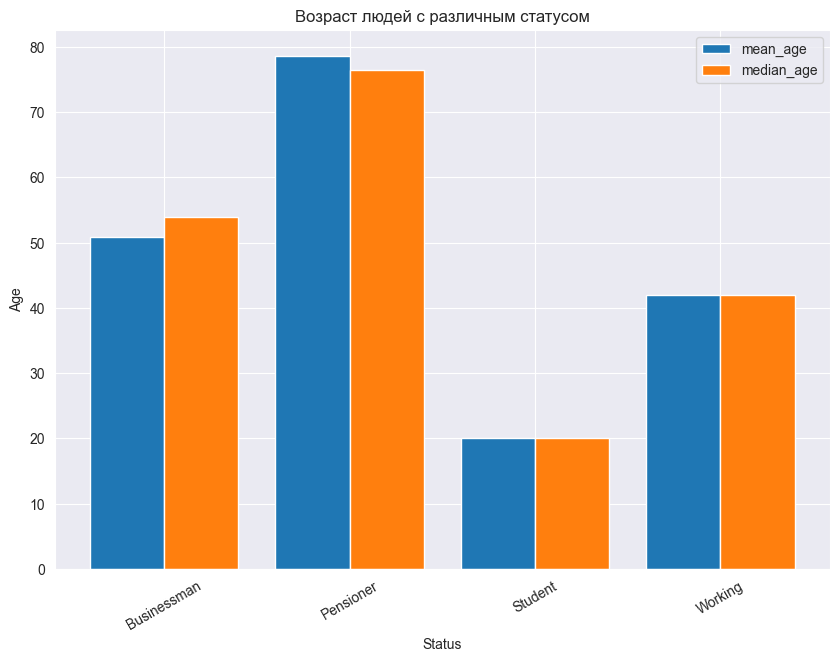

In [16]:
data_for_box_plox = pd.merge(
    pd.DataFrame(homework.groupby(homework["status"]).mean()['age']).rename(
        columns={'age': 'mean_age'}),
    pd.DataFrame(homework.groupby(homework["status"]).median()['age']).rename(
        columns={'age': 'median_age'}),
    left_index=True, right_index=True)
data_for_box_plox.reset_index(inplace=True)

# Строим столбчатую многорядную диаграмму
plt.figure(figsize=(10, 7))

# определяем кол-во делений
n_ticks = np.arange(len(data_for_box_plox['median_age']))

# определяем ширину столбцов
w = 0.4

# определяем сдвиг исходя из половины ширины столбцов
offset = 0.2

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data_for_box_plox['mean_age'], width=w, label='mean_age')
plt.bar(n_ticks + offset, data_for_box_plox['median_age'], width=w, label='median_age')

plt.title('Возраст людей с различным статусом')
plt.xlabel('Status')
plt.ylabel('Age')
plt.legend()
# plt.yscale('log')
plt.xticks(n_ticks, data_for_box_plox['status'], rotation=30)  # добавляем метки делений

plt.show()


Теперь рассмотрим распределение по дням недели 0 -это понедельник и т.п.

<Axes: xlabel='date'>

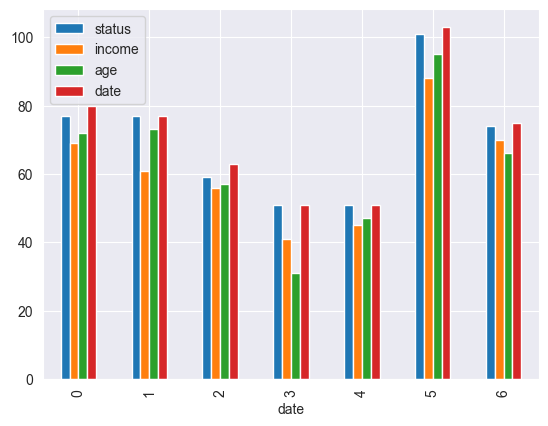

In [17]:
homework.groupby(homework["date"].dt.weekday).count().plot(kind="bar")

Видно, что в субботу(5) больше всего действий совершено было, а в четверг(3) больше всего пропусков в колонке age

Посмотрим что покажут нам ящики с усами

<Axes: xlabel='age'>

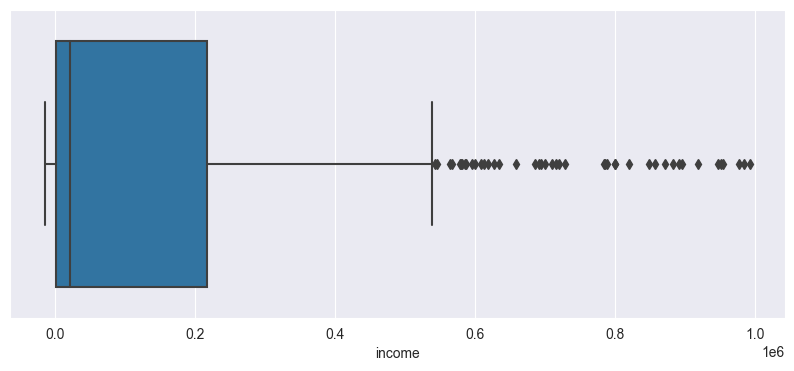

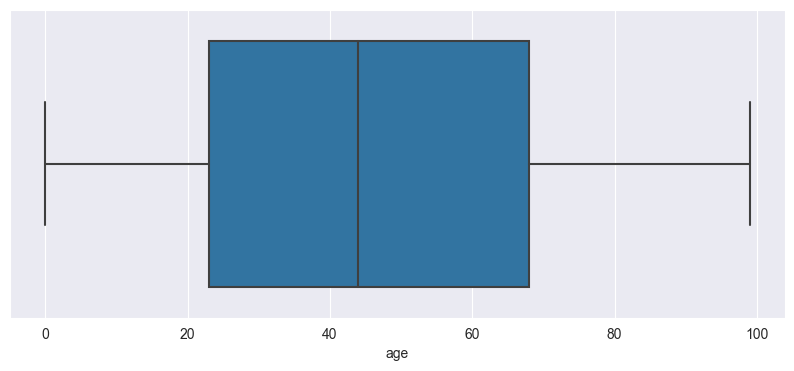

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=homework['income'])
plt.figure(figsize=(10, 4))
sns.boxplot(x=homework['age'])

Для начала заполним данные в колонке status

Так как части данных нет, то можно либо их удалить эти строки, либо их заполнить модой, но я решил оставить эти колонки, так как оня для задачи банковского скоринга они могут быть полезны

In [19]:
homework.loc[homework['status'].isnull(), 'status'] = homework['status'].mode()[0]

Проверим всё ли правильно выполнилось

In [20]:
homework[homework['status'].isnull()]

,status,income,age,date


Больше строк с пропусками в столбце stutus нет

Теперь приступим к столбцу income и его вычислим границы выбросов

In [21]:
income_column_one_and_half_interquantile_range = 1.5 * (
            homework['income'].quantile(0.75) - homework['income'].quantile(0.25))
income_column_buttom_border = homework['income'].quantile(
    0.25) - income_column_one_and_half_interquantile_range
income_column_top_border = homework['income'].quantile(
    0.75) + income_column_one_and_half_interquantile_range

In [22]:
homework.loc[homework["income"] > income_column_top_border].groupby('status').count()

,income,age,date
status,,,
Businessman,43,38,43
Student,1,1,1


Поскольку выбросы в доходе только у бизнесменов, то можно предположить, что это не выбросы для бизнесменов

Проверим это предположение

<Axes: xlabel='income'>

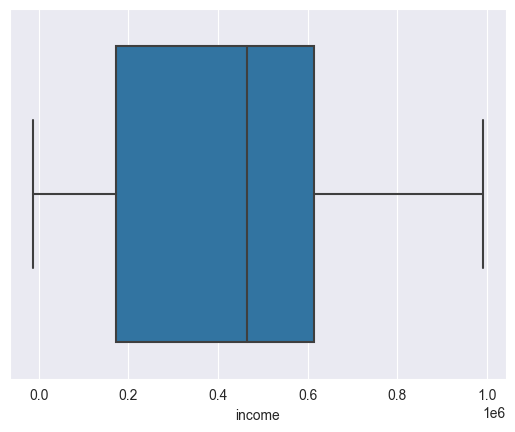

In [23]:
sns.boxplot(x=homework.loc[(homework['status'] == 'Businessman'), "income"])

Предположение оказалось верным

Заменим nan значения в колонке income на медианный инком по статусу

Заменим nan значения и нулевые значения в колонке age на средний возраст по статусу

In [24]:
median_income_by_status = homework.groupby('status').agg({'income': ['median']})
median_income_by_status.columns = pd.Index(
    [e[0] + "_" + e[1].upper() for e in median_income_by_status.columns.tolist()])
mean_age_by_status = homework.groupby('status').agg({'age': ['median']})
mean_age_by_status.columns = pd.Index(
    [e[0] + "_" + e[1].upper() for e in mean_age_by_status.columns.tolist()])

status_list = list(homework['status'].unique())

for i in status_list:
    homework.loc[((homework['status'] == i) & (homework['income'].isnull())), 'income'] = \
    median_income_by_status.loc[i].iloc[0]
    homework.loc[((homework['status'] == i) & (homework['age'] == 0)), 'age'] = \
    mean_age_by_status.loc[i].iloc[0]
    homework.loc[((homework['status'] == i) & (homework['age'].isnull())), 'age'] = \
    mean_age_by_status.loc[i].iloc[0]


In [25]:
homework.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   status  500 non-null    object        
 1   income  500 non-null    float64       
 2   age     500 non-null    float64       
 3   date    500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 19.5+ KB


Датасет готов

Посмотрим, как выглядит датасет после предобработки

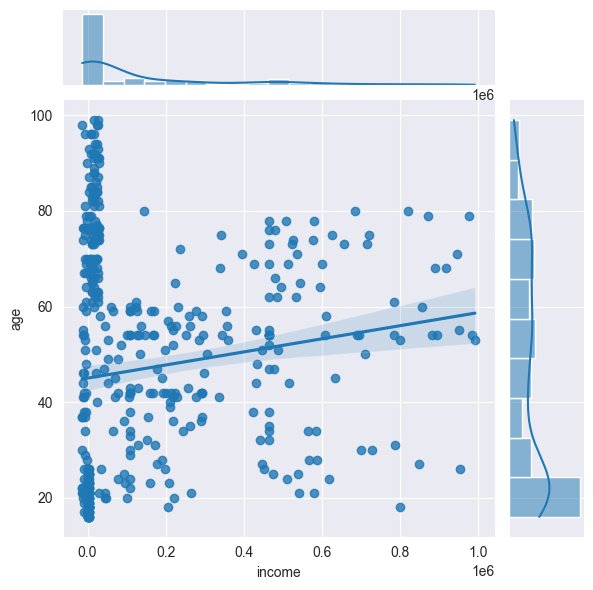

In [26]:
sns.jointplot(data=homework, x='income', y='age', kind='reg')

Как итог изменений сильных не видно, но немного изменилось распределение age столбца, теперь оно смещено ближе к более молодому возрасту